<a href="https://www.kaggle.com/code/markkiarie/enhanced-elbow-method-using-perpendicular-distance?scriptVersionId=212044079" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Elbow Method using Perpendicular Distances

This notebook implements an enhanced version of the **Elbow Method** to determine the optimal number of clusters (\(k\)) for a dataset. The method uses **perpendicular distances** from a baseline line to identify the "elbow" point on the curve of Sum of Squared Errors (SSE). Below is an explanation of the steps in the code:

## Steps:
1. **Data Generation:**
   - Synthetic data is generated using `make_blobs` with 300 samples and 5 centers for demonstration purposes.
   - This creates a dataset suitable for clustering experiments.

2. **SSE Calculation:**
   - For \(k\) values ranging from 1 to 10, the **k-means clustering algorithm** is applied.
   - The **SSE** (Sum of Squared Errors) is calculated for each \(k\) using `kmeans.inertia_`, which represents the total distance of all points to their cluster centers.
   - The resulting SSE values form the basis for detecting the "elbow."

3. **Baseline Line Construction:**
   - A straight line is drawn between the first (\(k=1\)) and the last (\(k=10\)) points on the SSE curve.
   - This line serves as a reference for identifying the point of maximum deviation (the elbow).

4. **Perpendicular Distance Calculation:**
   - For each point on the SSE curve, the perpendicular distance to the baseline is computed using the formula for the distance from a point to a line.
   - These distances quantify the deviation of each point from the baseline.

5. **Optimal \(k\) Detection:**
   - The point with the **maximum perpendicular distance** from the baseline is identified as the "elbow" point, corresponding to the optimal number of clusters (\(k\)).
   - This approach automates the elbow detection process, making it more reliable.

6. **Visualization:**
   - The SSE curve is plotted with markers for each \(k\), along with the baseline line and the detected elbow point.
   - The elbow point is highlighted in red, showing the optimal \(k\).

## Key Insights:
- This method provides a mathematical way to identify the elbow point, improving upon the manual inspection commonly used in the elbow method.
- The approach ensures consistency and accuracy, particularly when the SSE curve is not visually clear.

## Example Output:
The plot shows:
- The SSE curve for \(k\) values.
- The baseline connecting the first and last points on the curve.
- The elbow point with maximum perpendicular distance, indicating the optimal number of clusters.

This implementation can be extended to real-world datasets and clustering problems, making it a valuable tool for data analysis.


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs



In [2]:
# Generate example data
X, _ = make_blobs(n_samples=300, centers=5, random_state=42)




In [3]:
# Calculate SSE for different k values
sse = []
k_values = range(1, 11)
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    sse.append(kmeans.inertia_)



/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:8

In [4]:
# Create the baseline line
x1, y1 = k_values[0], sse[0]
x2, y2 = k_values[-1], sse[-1]
line = lambda x: (y2 - y1) / (x2 - x1) * (x - x1) + y1



In [5]:
# Calculate perpendicular distances
distances = []
for i in range(len(k_values)):
    x0, y0 = k_values[i], sse[i]
    numerator = abs((y2 - y1) * x0 - (x2 - x1) * y0 + x2 * y1 - y2 * x1)
    denominator = np.sqrt((y2 - y1)**2 + (x2 - x1)**2)
    distances.append(numerator / denominator)



In [6]:
# Find the elbow point
optimal_k = k_values[np.argmax(distances)]



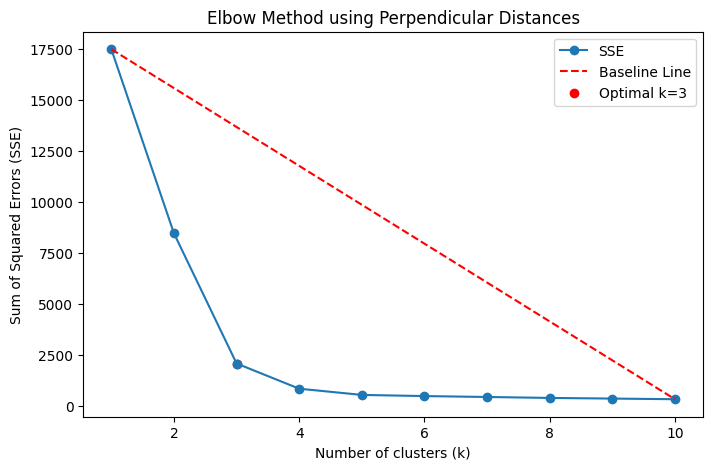

In [7]:
# Plot the results
plt.figure(figsize=(8, 5))
plt.plot(k_values, sse, '-o', label="SSE")
plt.plot([x1, x2], [y1, y2], 'r--', label="Baseline Line")
plt.scatter(optimal_k, sse[np.argmax(distances)], c='red', label=f"Optimal k={optimal_k}")
plt.xlabel("Number of clusters (k)")
plt.ylabel("Sum of Squared Errors (SSE)")
plt.title("Elbow Method using Perpendicular Distances")
plt.legend()
plt.show()